In [2]:
#! /home/lcesarini/miniconda3/envs/colorbar/bin/python
"""
Create xarray from list of defined events
"""

import os
import sys
sys.path.append("/mnt/beegfs/lcesarini/2022_resilience/")
import pickle
import numpy as np
import xarray as xr
from tqdm import tqdm
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# from resilience.utils import get_unlist,get_palettes,plot_bin_hist,read_file_events

os.chdir("/mnt/beegfs/lcesarini/2022_resilience/")
PATH_COMMON_DATA="//mnt/beegfs/lcesarini/DATA_FPS/ECMWF-ERAINT"


In [2]:
os.chdir("/home/lcesarini/2022_resilience")
sftlf=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/KNMI/CPM/sftlf_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_KNMI-HCLIM38h1-AROME_fpsconv-x2yn2-v1_fx.nc")

PATH_COMMON_DATA="/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT"
SEAS="JJA"

model=xr.open_mfdataset([f"{PATH_COMMON_DATA}/KNMI/CPM/pr/KNMI_ECMWF-ERAINT_{year}01010030-{year}12312330.nc" for year in np.arange(2000,2001)])
model_slice=model.isel(time=1).load()

# xr.where(sftlf.sftlf > 50,1,0)

idx_on_land=np.argwhere(xr.where(sftlf.sftlf > 50,1,0).values.reshape(-1)==1)
sftlf.sftlf.values.reshape(-1).shape[0]


42976

In [3]:
l_pr_sph,a_pr_sph,m_pr_sph=read_file_events(EV="pr",MDL='SPHERA',THR=90,INDICES=idx_on_land,SEAS="JJA")
l_mw_sph,a_mw_sph,m_mw_sph=read_file_events(EV="mw",MDL='SPHERA',THR=90,INDICES=idx_on_land,SEAS="JJA")
l_cb_sph,a_cb_sph,m_cb_sph=read_file_events(EV="combined",MDL='SPHERA',THR=90,INDICES=idx_on_land,SEAS="JJA")

l_pr_cpm,a_pr_cpm,m_pr_cpm=read_file_events(EV="pr",MDL='KNMI',THR=90,INDICES=idx_on_land,SEAS="JJA")
l_mw_cpm,a_mw_cpm,m_mw_cpm=read_file_events(EV="mw",MDL='KNMI',THR=90,INDICES=idx_on_land,SEAS="JJA")
l_cb_cpm,a_cb_cpm,m_cb_cpm=read_file_events(EV="combined",MDL='KNMI',THR=90,INDICES=idx_on_land,SEAS="JJA")


In [4]:
from matplotlib import colormaps
# list(colormaps)

In [5]:
duration=get_unlist(l_pr_sph)
avg_inte=get_unlist(a_pr_sph)
max_inte=get_unlist(m_pr_sph)
H, yedges, xedges = np.histogram2d(max_inte,
                                duration,
                                bins=[
                                    np.arange(np.min(max_inte).astype(np.int32),
                                                np.max(max_inte).astype(np.int32),
                                                (np.max(max_inte).astype(np.int32)-np.min(max_inte).astype(np.int32))/100),
                                    np.arange(np.min(duration).astype(np.int32),
                                                np.max(duration).astype(np.int32)+1,1),

                                    ]);

bins_pr_avg_inte=np.arange(np.min(avg_inte).astype(np.int32),
                                                np.max(avg_inte).astype(np.int32),
                                                (np.max(avg_inte).astype(np.int32)-np.min(avg_inte).astype(np.int32))/100)

bins_pr_max_inte=np.arange(np.min(max_inte).astype(np.int32),
                                                np.max(max_inte).astype(np.int32),
                                                (np.max(max_inte).astype(np.int32)-np.min(max_inte).astype(np.int32))/100)

bins_pr_duration=np.arange(np.min(duration).astype(np.int32),
                                                np.max(duration).astype(np.int32)+1,1)

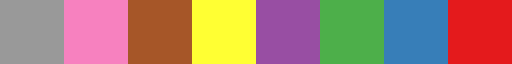

In [13]:
import matplotlib as mpl
mpl.colormaps['Set1_r'].resampled(8)

In [6]:
# np.save("/home/lcesarini/bins_pr_avg_inte.npy",bins_pr_avg_inte)
# np.save("/home/lcesarini/bins_pr_max_inte.npy",bins_pr_max_inte)
# np.save("/home/lcesarini/bins_pr_duration.npy",bins_pr_duration)

In [6]:
duration=get_unlist(l_mw_sph)
avg_inte=get_unlist(a_mw_sph)
max_inte=get_unlist(m_mw_sph)

bins_mw_avg_inte=np.arange(np.min(avg_inte).astype(np.int32),
                                                np.max(avg_inte).astype(np.int32),
                                                (np.max(avg_inte).astype(np.int32)-np.min(avg_inte).astype(np.int32))/100)

bins_mw_max_inte=np.arange(np.min(max_inte).astype(np.int32),
                                                np.max(max_inte).astype(np.int32),
                                                (np.max(max_inte).astype(np.int32)-np.min(max_inte).astype(np.int32))/100)

bins_mw_duration=np.arange(np.min(duration).astype(np.int32),
                                                np.max(duration).astype(np.int32)+1,1)

In [36]:
# np.save("/home/lcesarini/bins_mw_avg_inte.npy",bins_mw_avg_inte)
# np.save("/home/lcesarini/bins_mw_max_inte.npy",bins_mw_max_inte)
# np.save("/home/lcesarini/bins_mw_duration.npy",bins_mw_duration)

In [ ]:
ictp_rg=xr.open_mfdataset(f"{PATH_COMMON_DATA}/ICTP/CPM/{ENV_VAR}/*").load()

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_bin_hist(list_of_len,list_of_max,list_of_avg,
                  bins_max,bins_avg,bins_duration,
                  name_model='SPHERA',ev='Precipitation',
                  SAVE=True,palette="rainbow",
                  ):
    """
    
    Parameters
    ----------
    list_of_len : list, defaults to None
        a list with the duration of the events

    list_of_max : list, defaults to None
        a list with the max value of each event

    list_of_avg : list, defaults to None
        a list with the average value of each event

    name_model : str, defaults to None
        Name of the model 

    ev : str, defaults to None
        environmental variable to plot. Either "precipitation","wind", or "combined

    SAVE : bool, defaults to None
        True if you want to save it to disk.


    Returns
    -------

    A plto
    

    Examples
    --------


    """
    duration=get_unlist(list_of_len)
    avg_inte=get_unlist(list_of_avg)
    max_inte=get_unlist(list_of_max)

    H, yedges, xedges = np.histogram2d(max_inte,
                                    duration,
                                    bins=[bins_max,bins_duration]);

    H2, yedges2, xedges2 = np.histogram2d(avg_inte,
                                        duration,
                                        bins=[bins_avg,bins_duration]);
    # print(xedges)
    #np.log([0.2,5,10,20,50,100,170])

    # Plot histogram using pcolormesh
    fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(14,6), sharey=False)
    if ev =="Precipitation":
        pcm=ax1.pcolormesh(xedges, np.log(yedges), np.where(H==0,np.nan,H)/len(duration), 
                            cmap=palette,
                            norm=mpl.colors.Normalize(vmin=0.005,vmax=0.08))

        ax1.set_ylim(np.log(np.min(max_inte)), np.log(np.max(max_inte)))
        ax1.set_xlim(np.min(duration), np.min([np.max(duration),8]))
        ax1.set_ylabel('Peak Intensity')
        ax1.set_xlabel('Duration')
        ax1.set_title('')
        ax1.set_xticks(np.arange(1,11,2))
        ax1.set_xticklabels(np.arange(1,11,2))
        ax1.set_yticks(np.log([5,10,20,50,100,170]))
        ax1.set_yticklabels([5,10,20,50,100,170])
        # ax1.grid()
        cbar = plt.colorbar(pcm)
        # Set colorbar label
        cbar.set_label('', rotation=270, labelpad=20)

        pcm2=ax2.pcolormesh(xedges2, np.log(yedges2), (np.where(H2==0,np.nan,H2)/len(duration)), 
                            cmap=palette,
                            norm=mpl.colors.Normalize(vmin=0.005,vmax=1))
        ax2.set_ylim(np.log(np.min(avg_inte)), np.log(np.max(avg_inte)))
        ax2.set_xlim(np.min(duration), np.min([np.max(duration),8]))
        ax2.set_ylabel('Mean Intensity')
        ax2.set_xlabel('Duration')
        ax2.set_title('')
        # ax2.set_yticks(np.arange(0,100,2.5))
        # ax2.set_yticklabels(position=np.arange(0,100,10),labels=np.arange(0,100,10))
        ax2.set_xticks(np.arange(1,11,2))
        ax2.set_xticklabels(labels=np.arange(1,11,2))
        ax2.set_yticks(np.log([5,10,20,50,100,170]))
        ax2.set_yticklabels([5,10,20,50,100,170])
    elif ev == 'Wind':
        pcm=ax1.pcolormesh(xedges2, (yedges2), (np.where(H2==0,np.nan,H2)/len(duration)),
                            cmap=palette,
                            norm=mpl.colors.Normalize(vmin=0.001,vmax=0.05))
        ax1.set_ylim((np.min(max_inte)), (np.max(max_inte)))
        # ax1.set_ylim((np.min(max_inte)), 20)
        ax1.set_xlim(np.min(duration),  np.min([np.max(duration),8]))        # ax1.set_xlim(np.min(duration), 20)
        ax1.set_ylabel('Peak Intensity')
        ax1.set_xlabel('Duration')
        ax1.set_title('')
        # ax1.set_xticks(np.arange(0,10,2))
        # ax1.set_xticklabels(np.arange(0,10,2))
        # ax1.set_yticks(([5,10,20,50,100,170]))
        # ax1.set_yticklabels([5,10,20,50,100,170])
        # ax1.grid()
        cbar = plt.colorbar(pcm)
        # Set colorbar label
        cbar.set_label('', rotation=270, labelpad=20)

        pcm2=ax2.pcolormesh(xedges2, (yedges2), (np.where(H2==0,np.nan,H2)/len(duration)),
                            cmap=palette,
                            norm=mpl.colors.Normalize(vmin=0.001,vmax=0.05))
        ax2.set_ylim((np.min(avg_inte)), (np.max(avg_inte)))
        ax2.set_xlim(np.min(duration),  np.min([np.max(duration),8]))
        ax2.set_ylabel('Mean Intensity')
        ax2.set_xlabel('Duration')
        ax2.set_title('')
        # ax2.set_yticks(np.arange(0,100,2.5))
        # ax2.set_yticklabels(position=np.arange(0,100,10),labels=np.arange(0,100,10))
        # ax2.set_xticks(np.arange(0,10,2))
        # ax2.set_xticklabels(labels=np.arange(0,10,2))
        # ax2.set_yticks(([5,10,20,50,100,170]))
        # ax2.set_yticklabels([5,10,20,50,100,170])
    # ax2.grid()
    cbar = plt.colorbar(pcm2)
    # Set colorbar label
    cbar.set_label('', rotation=270, labelpad=20)
    plt.suptitle(f"{name_model} for {ev}")
    if SAVE:
        plt.savefig(f"/home/lcesarini/{name_model}_{ev}.png")
    else:
        plt.show()


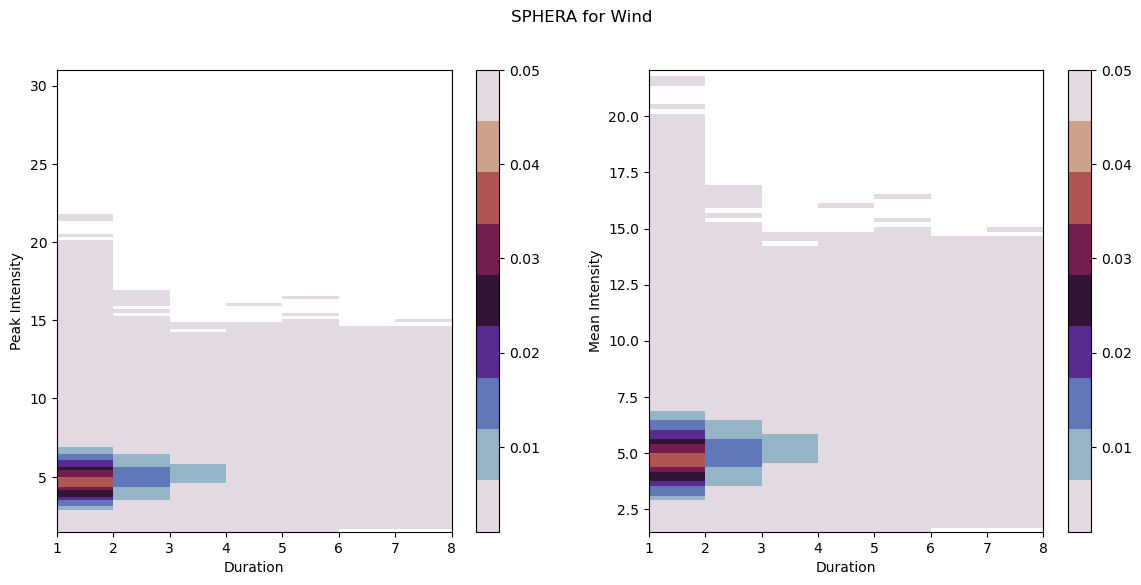

In [32]:
plot_bin_hist(list_of_len=l_mw_sph,
              list_of_max=m_mw_sph,
              list_of_avg=a_mw_sph,
              bins_max=bins_mw_max_inte,
              bins_avg=bins_mw_avg_inte,
              bins_duration=bins_mw_duration,
              name_model="SPHERA",
              ev="Wind",SAVE=False,palette=mpl.colormaps['twilight'].resampled(6))


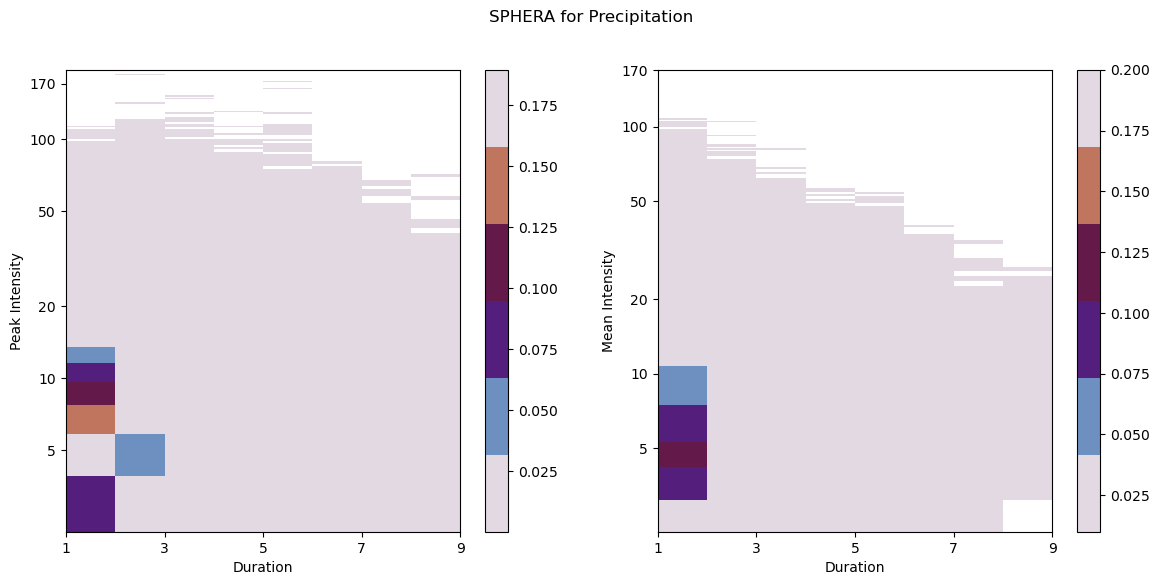

In [33]:
import matplotlib as mpl
from resilience.utils import plot_bin_hist

plot_bin_hist(list_of_len=l_pr_sph,
              list_of_max=m_pr_sph,
              list_of_avg=a_pr_sph,
              bins_max=bins_pr_max_inte,
              bins_avg=bins_pr_avg_inte,
              bins_duration=bins_pr_duration,
              name_model="SPHERA",
              ev="Precipitation",SAVE=False,palette=mpl.colormaps['twilight'].resampled(6))


Text(0.5, 0.98, 'Precipitation')

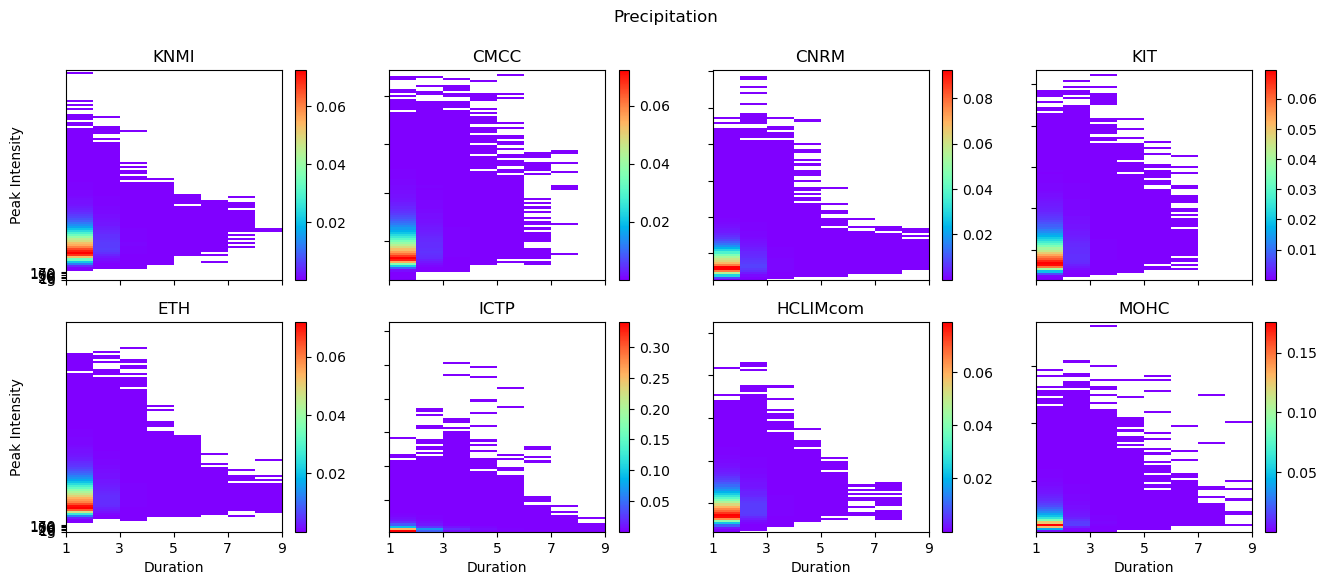

In [40]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(16,6), sharey=False)
palette='rainbow'
ax=axs.flatten()
for i,MDL in enumerate(["KNMI","CMCC","CNRM","KIT","ETH","ICTP","HCLIMcom","MOHC"]): #"KNMI","CMCC","CNRM","KIT",
    l_pr_cpm,a_pr_cpm,m_pr_cpm=read_file_events(EV="pr",MDL=MDL,THR=99,INDICES=idx_on_land,SEAS="JJA")
    
    duration=get_unlist(l_pr_cpm)
    avg_inte=get_unlist(a_pr_cpm)
    max_inte=get_unlist(m_pr_cpm)

    H, yedges, xedges = np.histogram2d(max_inte,
                                    duration,
                                    bins=[
                                        np.arange(np.min(max_inte).astype(np.int32),
                                                  np.max(max_inte).astype(np.int32),
                                                  (np.max(max_inte).astype(np.int32)-np.min(max_inte).astype(np.int32))/100),
                                        np.arange(np.min(duration).astype(np.int32),
                                                  np.max(duration).astype(np.int32)+1,1),
                                        ]
                                          );

    pcm=ax[i].pcolormesh(xedges, (yedges), np.where(H==0,np.nan,H)/len(duration), cmap=palette)
    ax[i].set_ylim((np.min(max_inte)), (np.max(max_inte)))
    ax[i].set_xlim(np.min(duration), np.min([np.max(duration),8]))
    if i in [0,4]:
        ax[i].set_ylabel('Peak Intensity')
        ax[i].set_yticks(np.log([5,10,20,50,100,170]))
        ax[i].set_yticklabels([5,10,20,50,100,170])
    else:    
        ax[i].set_ylabel('')
        ax[i].set_yticklabels(["" for _ in [5,10,20,50,100,170]])

    if i in [4,5,6,7]:
        ax[i].set_xlabel('Duration')
        ax[i].set_xticks(np.arange(1,11,2))
        ax[i].set_xticklabels(np.arange(1,11,2))
    else:
        ax[i].set_xlabel('')
        ax[i].set_xticks(np.arange(1,11,2))
        ax[i].set_xticklabels(["" for _ in np.arange(1,11,2)])
    ax[i].set_title(f"{MDL}")
    # ax1.grid()
    cbar = plt.colorbar(pcm)
    # Set colorbar label
    cbar.set_label('', rotation=270, labelpad=20)
plt.suptitle(f"Precipitation")


Text(0.5, 0.98, 'Wind')

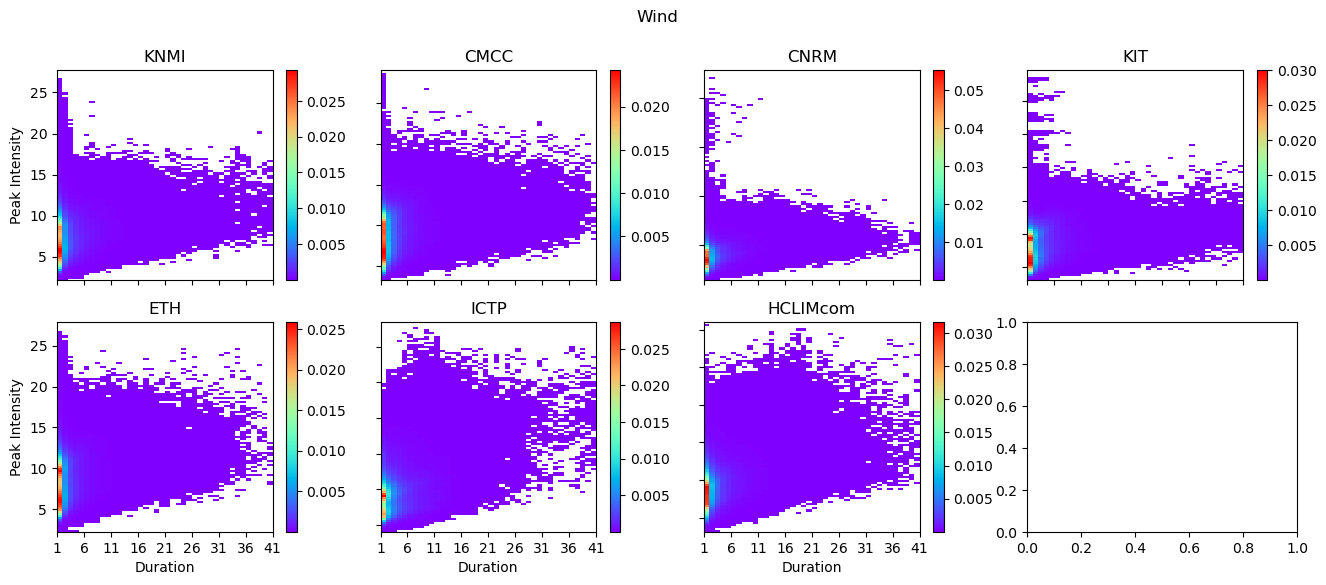

In [12]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(16,6), sharey=False)
palette='rainbow'
ax=axs.flatten()
for i,MDL in enumerate(["KNMI","CMCC","CNRM","KIT","ETH","ICTP","HCLIMcom"]): #"KNMI","CMCC","CNRM","KIT",
    l_pr_cpm,a_pr_cpm,m_pr_cpm=read_file_events(EV="mw",MDL=MDL,THR=99,INDICES=idx_on_land,SEAS="JJA")
    
    duration=get_unlist(l_pr_cpm)
    avg_inte=get_unlist(a_pr_cpm)
    max_inte=get_unlist(m_pr_cpm)

    H, yedges, xedges = np.histogram2d(max_inte,
                                    duration,
                                    bins=[
                                        np.arange(np.min(max_inte).astype(np.int32),
                                                  np.max(max_inte).astype(np.int32),
                                                  (np.max(max_inte).astype(np.int32)-np.min(max_inte).astype(np.int32))/100),
                                        np.arange(np.min(duration).astype(np.int32),
                                                  np.max(duration).astype(np.int32)+1,1),
                                        ]
                                          );

    pcm=ax[i].pcolormesh(xedges, (yedges), np.where(H==0,np.nan,H)/len(duration), cmap=palette)
    ax[i].set_ylim((np.min(max_inte)), (np.max(max_inte)))
    ax[i].set_xlim(np.min(duration), np.min([np.max(duration),8]))
    if i in [0,4]:
        ax[i].set_ylabel('Peak Intensity')
        ax[i].set_yticks(([5,10,15,20,25]))
        ax[i].set_yticklabels([5,10,15,20,25])
    else:    
        ax[i].set_ylabel('')
        ax[i].set_yticklabels(["" for _ in [5,10,15,20,25]])

    if i in [4,5,6,7]:
        ax[i].set_xlabel('Duration')
        ax[i].set_xticks(np.arange(1,45,5))
        ax[i].set_xticklabels(np.arange(1,45,5))
    else:
        ax[i].set_xlabel('')
        ax[i].set_xticks(np.arange(1,45,5))
        ax[i].set_xticklabels(["" for _ in np.arange(1,45,5)])
    ax[i].set_title(f"{MDL}")
    # ax1.grid()
    cbar = plt.colorbar(pcm)
    # Set colorbar label
    cbar.set_label('', rotation=270, labelpad=20)
plt.suptitle(f"Wind")


Text(0.5, 0.98, 'Wind')

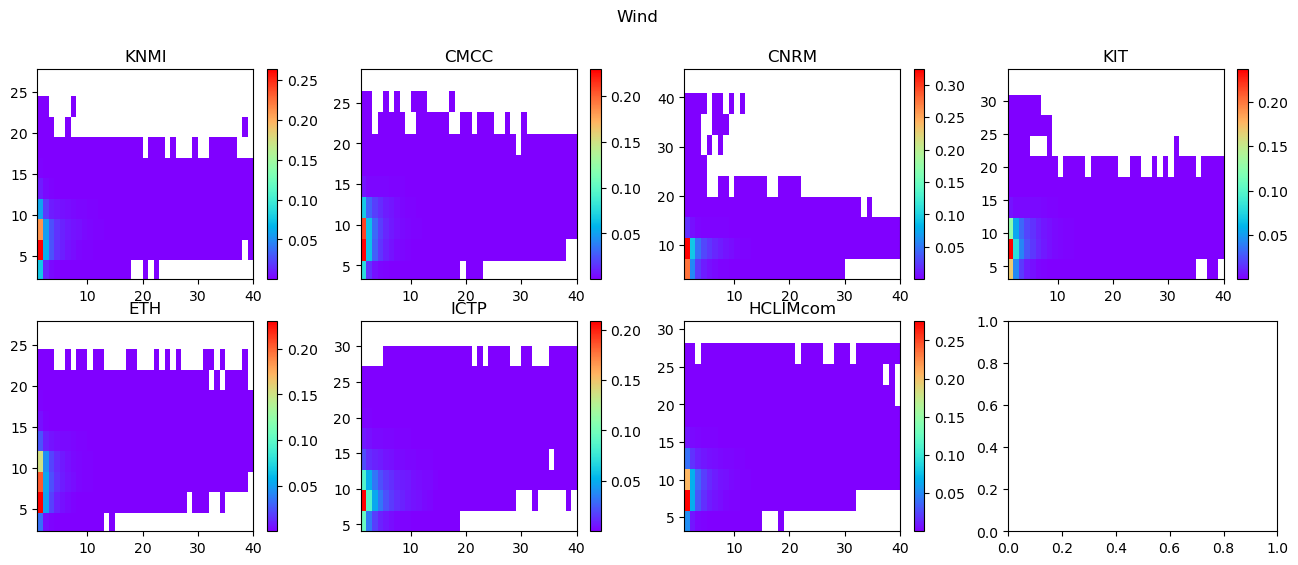

In [14]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(16,6), sharey=False)
palette='rainbow'
ax=axs.flatten()
for i,MDL in enumerate(["KNMI","CMCC","CNRM","KIT","ETH","ICTP","HCLIMcom"]): #"KNMI","CMCC","CNRM","KIT",
    l_mw_cpm,a_mw_cpm,m_mw_cpm=read_file_events(EV="mw",MDL=MDL,THR=99,INDICES=idx_on_land,SEAS="JJA")
    
    duration=get_unlist(l_mw_cpm)
    avg_inte=get_unlist(a_mw_cpm)
    max_inte=get_unlist(m_mw_cpm)

    H, yedges, xedges = np.histogram2d(max_inte,
                                    duration,
                                    bins=[
                                        np.arange(np.min(max_inte).astype(np.int32),
                                                  np.max(max_inte).astype(np.int32),
                                                  (np.max(max_inte).astype(np.int32)-np.min(max_inte).astype(np.int32))/10),
                                        np.arange(np.min(duration).astype(np.int32),
                                                  np.max(duration).astype(np.int32),1),
                                        ]
                                          );

    pcm=ax[i].pcolormesh(xedges, (yedges), np.where(H==0,np.nan,H)/len(duration), cmap=palette)
    ax[i].set_ylim(np.min(max_inte), np.max(max_inte))
    ax[i].set_xlim(np.min(duration), np.min([np.max(duration),40]))
    # if i in [0,4]:
    #     ax[i].set_ylabel('Peak Intensity')
    # else:    
    #     ax[i].set_ylabel('')
    #     ax[i].set_yticklabels("")

    # if i in [4,5,6,7]:
    #     ax[i].set_xlabel('Duration')
    # else:
    #     ax[i].set_xlabel('')
    #     ax[i].set_xticklabels("")
    ax[i].set_title(f"{MDL}")
    # ax1.grid()
    cbar = plt.colorbar(pcm)
    # Set colorbar label
    cbar.set_label('', rotation=270, labelpad=20)
plt.suptitle(f"Wind")


In [2]:
def _count_threshold_periods(arr,thr):
    above_threshold_periods = []
    current_period = []
    for element in arr:
        if element > thr:
            current_period.append(element)
        else:
            if current_period:
                above_threshold_periods.append(current_period)
                current_period = []
    
    # Check if the last period extends beyond the end of the array
    if current_period:
        above_threshold_periods.append(current_period)

    n_event=[len(x) for x in above_threshold_periods]
    max_int=[max(x) for x in above_threshold_periods]
    mean_int=[np.mean(x) for x in above_threshold_periods]
    
    return n_event,max_int,mean_int

In [3]:
_count_threshold_periods([1,1,1,1,1,2,2,1,2],1)

([2, 1], [2, 2], [2.0, 2.0])

In [30]:
!ls -l /mnt/data/lcesarini/EVENTS/combined


totale 145576
-rw-------. 1 lcesarini lcesarini  3079111  8 nov 17.35 KNMI_len_events_0.9_0.9_JJA.pkl
-rw-------. 1 lcesarini lcesarini   210171  7 nov 01.08 KNMI_len_events_11.5_12.pkl
-rw-------. 1 lcesarini lcesarini 49601874  8 nov 17.35 KNMI_max_events_0.9_0.9_JJA.pkl
-rw-------. 1 lcesarini lcesarini  1830920  7 nov 01.08 KNMI_max_events_11.5_12.pkl
-rw-------. 1 lcesarini lcesarini 21979039  8 nov 17.35 KNMI_mean_events_0.9_0.9_JJA.pkl
-rw-------. 1 lcesarini lcesarini   868653  7 nov 01.08 KNMI_mean_events_11.5_12.pkl
-rw-------. 1 lcesarini lcesarini  2449646  8 nov 18.11 SPHERA_len_events_0.9_0.9_JJA.pkl
-rw-------. 1 lcesarini lcesarini   218668  6 nov 23.40 SPHERA_len_events_11.5_12.pkl
-rw-------. 1 lcesarini lcesarini 43496443  8 nov 18.12 SPHERA_max_events_0.9_0.9_JJA.pkl
-rw-------. 1 lcesarini lcesarini  2280282  6 nov 23.40 SPHERA_max_events_11.5_12.pkl
-rw-------. 1 lcesarini lcesarini 21832888  8 nov 18.12 SPHERA_mean_events_0.9_0.9_JJA.pkl
-rw-------. 1 lcesarini l

# Violin plot combined events

In [49]:
l_pr_sph,a_pr_sph,m_pr_sph=read_file_events(EV="pr",MDL='SPHERA',THR=0.9)
l_mw_sph,a_mw_sph,m_mw_sph=read_file_events(EV="mw",MDL='SPHERA',THR=0.9)
l_cb_sph,a_cb_sph,m_cb_sph=read_file_events(EV="combined",MDL='SPHERA',THR=0.9)

l_pr_cpm,a_pr_cpm,m_pr_cpm=read_file_events(EV="pr",MDL='KNMI',THR=0.9)
l_mw_cpm,a_mw_cpm,m_mw_cpm=read_file_events(EV="mw",MDL='KNMI',THR=0.9)
l_cb_cpm,a_cb_cpm,m_cb_cpm=read_file_events(EV="combined",MDL='KNMI',THR=0.9)

In [26]:
len(get_unlist(l_cb_cpm)),len(get_unlist(l_cb_sph))

(59896, 29617)

In [29]:
import pandas as pd
df_1=pd.DataFrame({"Precipitation":get_unlist(l_pr_cpm)}).melt()
df_2=pd.DataFrame({"Wind":get_unlist(l_mw_cpm)}).melt()
df_3=pd.DataFrame({"Combined":get_unlist(l_cb_cpm)}).melt()
df_concat=pd.concat([df_1,df_2,df_3])

(0.0, 5.0)

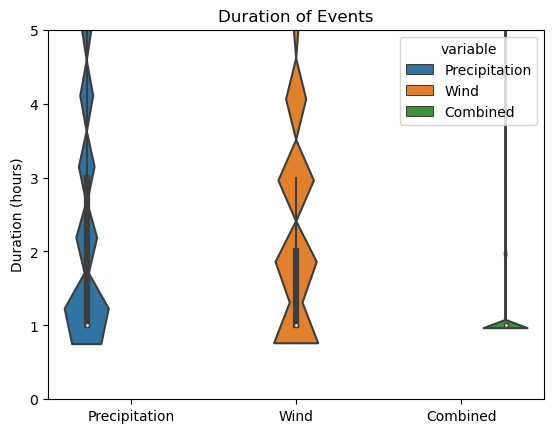

In [30]:
import seaborn as sns
ax= sns.violinplot(df_concat.rename(columns={"value":"Duration"}),x="variable",y="Duration",hue="variable");
ax.set_title("Duration of Events")
ax.set_ylabel("Duration (hours)")
ax.set_xlabel("")
ax.set_ylim(0,5)

# MAP EVENTS

In [4]:
model=xr.open_mfdataset([f"{PATH_COMMON_DATA}/KNMI/CPM/pr/KNMI_ECMWF-ERAINT_{year}01010030-{year}12312330.nc" for year in np.arange(2000,2001)])


model_slice=model.isel(time=1).load()
model_slice

<xarray.Dataset>
Dimensions:    (bnds: 2, lon: 272, lat: 158)
Coordinates:
    time       datetime64[ns] 2000-01-01T01:30:00
  * lon        (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * lat        (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (bnds) datetime64[ns] 2000-01-01T01:00:00 2000-01-01T02:00:00
    pr         (lat, lon) float32 0.0 0.0 0.0 ... 5.313e-06 9.489e-06 4.368e-05
Attributes: (12/31)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    history:                        Mon Feb 13 12:05:01 2023: cdo remapycon,n...
    source:                         HARMONIE Climate Modelling Community (HCL...
    institution:                    Royal Netherlands Meteorological Institute
    Conventions:                    CF-1.4
    frequency:                      1hr
    ...                             ...
    comment_1stNest:                direct downscaling from ERA-Interim 0.75x...
    comment_2ndNest:                actual convection permitting FPS simulati...
    references:                     https://hirlam.org/trac/wiki/HarmonieClimate
    knmi_global_comment:            converted from FA to NetCDF with gl/xtool...
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [5]:
longitude=[]
latitude=[]

for i in tqdm(range(158)):
    for j in range(272):
        lon,lat=model_slice.isel(lat=i,lon=j).lon.item(),model_slice.isel(lat=i,lon=j).lat.item()

        longitude.append(lon)
        latitude.append(lat)



100%|██████████| 158/158 [00:09<00:00, 17.20it/s]


In [6]:
def read_file_events(EV,MDL,THR,SEAS,INDICES,WH=False):
    """
    Functions that select inside a given extent

    Parameters
    ----------
    EV : str, 
        environmental varaible [pr,mw,combined]
    
    MDL: str,
        name of the model.

    THR:     str or int,
        threshold use to find the events

    SEAS:     str,
        Season of the event [JJA,MAM,SON,DJF]
    
    INDICES:     list,
        list of indices of land grid pointzzz
    
    Returns
    -------
    
    Store the data in a csv

    Examples
    --------
    """
        
    if EV == "combined":
        with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_len_events_{THR}_{THR}_{SEAS}.pkl', 'rb') as file:
            len_per_above_threshold=pickle.load(file)

        with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_mean_events_{THR}_{THR}_{SEAS}.pkl', 'rb') as file:
            mean_per_periods=pickle.load(file)

        with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_max_events_{THR}_{THR}_{SEAS}.pkl', 'rb') as file:
            max_per_periods=pickle.load(file)
    elif EV == "mw":
        with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_len_events_{THR}_{SEAS}.pkl', 'rb') as file:
            len_per_above_threshold=pickle.load(file)

        with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_mw_mean_events_{THR}_{SEAS}.pkl', 'rb') as file:
            mean_per_periods=pickle.load(file)

        with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_mw_max_events_{THR}_{SEAS}.pkl', 'rb') as file:
            max_per_periods=pickle.load(file)    
    else:
        if WH:
            with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_len_events_{THR}_{SEAS}_WH.pkl', 'rb') as file:
                len_per_above_threshold=pickle.load(file)

            with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_mean_events_{THR}_{SEAS}_WH.pkl', 'rb') as file:
                mean_per_periods=pickle.load(file)

            with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_max_events_{THR}_{SEAS}_WH.pkl', 'rb') as file:
                max_per_periods=pickle.load(file)    
        else:
            with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_len_events_{THR}_{SEAS}.pkl', 'rb') as file:
                len_per_above_threshold=pickle.load(file)

            with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_mean_events_{THR}_{SEAS}.pkl', 'rb') as file:
                mean_per_periods=pickle.load(file)

            with open(f'/mnt/data/lcesarini/EVENTS/{EV}/{MDL}_max_events_{THR}_{SEAS}.pkl', 'rb') as file:
                max_per_periods=pickle.load(file)    
    
    return (
        [len_per_above_threshold[ii.item()] for ii in INDICES],
        [mean_per_periods[ii.item()] for ii in INDICES],
        [max_per_periods[ii.item()] for ii in INDICES]
    )

In [7]:
l_pr_sph,a_pr_sph,m_pr_sph=read_file_events(EV="pr",MDL='SPHERA',THR=90,INDICES=np.arange(len(latitude)),SEAS="JJA",WH=True)
l_mw_sph,a_mw_sph,m_mw_sph=read_file_events(EV="mw",MDL='SPHERA',THR=90,INDICES=np.arange(len(latitude)),SEAS="JJA")
l_cb_sph,a_cb_sph,m_cb_sph=read_file_events(EV="combined",MDL='SPHERA',THR=90,INDICES=np.arange(len(latitude)),SEAS="JJA")

l_pr_cpm,a_pr_cpm,m_pr_cpm=read_file_events(EV="pr",MDL='KNMI',THR=90,INDICES=np.arange(len(latitude)),SEAS="JJA",WH=True)
l_mw_cpm,a_mw_cpm,m_mw_cpm=read_file_events(EV="mw",MDL='KNMI',THR=90,INDICES=np.arange(len(latitude)),SEAS="JJA")
l_cb_cpm,a_cb_cpm,m_cb_cpm=read_file_events(EV="combined",MDL='KNMI',THR=90,INDICES=np.arange(len(latitude)),SEAS="JJA")

In [8]:
ds_pr_sph = xr.Dataset(
    data_vars=dict(
        n_event=(["lat", "lon"],np.array([len(x) for x in l_pr_sph]).reshape(158,272)),
        avg_int=(["lat", "lon"],np.array([np.median(x) for x in a_pr_sph]).reshape(158,272)),
        max_int=(["lat", "lon"],np.array([np.median(x) for x in m_pr_sph]).reshape(158,272)),
        
    ),
    coords=dict(
        lon=np.unique(longitude),
        lat=np.unique(latitude)
    ),
    attrs=model_slice.attrs,
)
ds_mw_sph = xr.Dataset(
    data_vars=dict(
        n_event=(["lat", "lon"],np.array([len(x) for x in l_mw_sph]).reshape(158,272)),
        avg_int=(["lat", "lon"],np.array([np.median(x) for x in a_mw_sph]).reshape(158,272)),
        max_int=(["lat", "lon"],np.array([np.median(x) for x in m_mw_sph]).reshape(158,272)),
        
    ),
    coords=dict(
        lon=np.unique(longitude),
        lat=np.unique(latitude)
    ),
    attrs=model_slice.attrs,
)
ds_cb_sph = xr.Dataset(
    data_vars=dict(
        n_event=(["lat", "lon"],np.array([len(x) for x in l_cb_sph]).reshape(158,272)),
        avg_int=(["lat", "lon"],np.array([np.median(x) for x in a_cb_sph]).reshape(158,272)),
        max_int=(["lat", "lon"],np.array([np.median(x) for x in m_cb_sph]).reshape(158,272)),
        
    ),
    coords=dict(
        lon=np.unique(longitude),
        lat=np.unique(latitude)
    ),
    attrs=model_slice.attrs,
)
# ds_cb_cpm = xr.Dataset(
#     data_vars=dict(
#         n_event=(["lat", "lon"],np.array([len(x) for x in l_cb_cpm]).reshape(158,272)),
#         avg_int=(["lat", "lon"],np.array([np.median(x) for x in a_cb_cpm]).reshape(158,272)),
#         max_int=(["lat", "lon"],np.array([np.median(x) for x in m_cb_cpm]).reshape(158,272)),
        
#     ),
#     coords=dict(
#         lon=np.unique(longitude),
#         lat=np.unique(latitude)
#     ),
#     attrs=model_slice.attrs,
# )
ds_pr_cpm = xr.Dataset(
    data_vars=dict(
        n_event=(["lat", "lon"],np.array([len(x) for x in l_pr_cpm]).reshape(158,272)),
        avg_int=(["lat", "lon"],np.array([np.median(x) for x in a_pr_cpm]).reshape(158,272)),
        max_int=(["lat", "lon"],np.array([np.median(x) for x in m_pr_cpm]).reshape(158,272)),
        
    ),
    coords=dict(
        lon=np.unique(longitude),
        lat=np.unique(latitude)
    ),
    attrs=model_slice.attrs,
)
ds_mw_cpm = xr.Dataset(
    data_vars=dict(
        n_event=(["lat", "lon"],np.array([len(x) for x in l_mw_cpm]).reshape(158,272)),
        avg_int=(["lat", "lon"],np.array([np.median(x) for x in a_mw_cpm]).reshape(158,272)),
        max_int=(["lat", "lon"],np.array([np.median(x) for x in m_mw_cpm]).reshape(158,272)),
        
    ),
    coords=dict(
        lon=np.unique(longitude),
        lat=np.unique(latitude)
    ),
    attrs=model_slice.attrs,
)
ds_cb_cpm = xr.Dataset(
    data_vars=dict(
        n_event=(["lat", "lon"],np.array([len(x) for x in l_cb_cpm]).reshape(158,272)),
        avg_int=(["lat", "lon"],np.array([np.median(x) for x in a_cb_cpm]).reshape(158,272)),
        max_int=(["lat", "lon"],np.array([np.median(x) for x in m_cb_cpm]).reshape(158,272)),
        
    ),
    coords=dict(
        lon=np.unique(longitude),
        lat=np.unique(latitude)
    ),
    attrs=model_slice.attrs,
)

In [9]:
list_xr_cpm=[]
for i,MDL in enumerate(["KNMI","CMCC","CNRM","KIT","ETH","ICTP","HCLIMcom"]):
    l_pr_cpm,a_pr_cpm,m_pr_cpm=read_file_events(EV="pr",MDL=MDL,THR=90,INDICES=np.arange(len(latitude)),SEAS="JJA",WH=True)

    ds_pr_cpm = xr.Dataset(
        data_vars=dict(
            n_event=(["lat", "lon"],np.array([len(x) for x in l_pr_cpm]).reshape(158,272)),
            avg_int=(["lat", "lon"],np.array([np.median(x) for x in a_pr_cpm]).reshape(158,272)),
            max_int=(["lat", "lon"],np.array([np.median(x) for x in m_pr_cpm]).reshape(158,272)),
            
        ),
        coords=dict(
            lon=np.unique(longitude),
            lat=np.unique(latitude)
        ),
        attrs=model_slice.attrs,
    )

    list_xr_cpm.append(ds_pr_cpm)

In [10]:
list_xr_cpm_mw=[]
for i,MDL in enumerate(["KNMI","CMCC","CNRM","KIT","ETH","ICTP","HCLIMcom"]):
    l_mw_cpm,a_mw_cpm,m_mw_cpm=read_file_events(EV="mw",MDL=MDL,THR=90,INDICES=np.arange(len(latitude)),SEAS="JJA")

    ds_mw_cpm = xr.Dataset(
        data_vars=dict(
            n_event=(["lat", "lon"],np.array([len(x) for x in l_mw_cpm]).reshape(158,272)),
            avg_int=(["lat", "lon"],np.array([np.median(x) for x in a_mw_cpm]).reshape(158,272)),
            max_int=(["lat", "lon"],np.array([np.median(x) for x in m_mw_cpm]).reshape(158,272)),
            
        ),
        coords=dict(
            lon=np.unique(longitude),
            lat=np.unique(latitude)
        ),
        attrs=model_slice.attrs,
    )

    list_xr_cpm_mw.append(ds_mw_cpm)

In [11]:
dict(
            lon=np.unique(longitude),
            lat=np.unique(latitude)
        )

{'lon': array([ 6.5       ,  6.5274992 ,  6.5549984 ,  6.5824976 ,  6.6099968 ,
         6.63749599,  6.66499519,  6.69249439,  6.71999359,  6.74749279,
         6.77499199,  6.80249119,  6.82999039,  6.85748959,  6.88498878,
         6.91248798,  6.93998718,  6.96748638,  6.99498558,  7.02248478,
         7.04998398,  7.07748318,  7.10498238,  7.13248158,  7.15998077,
         7.18747997,  7.21497917,  7.24247837,  7.26997757,  7.29747677,
         7.32497597,  7.35247517,  7.37997437,  7.40747356,  7.43497276,
         7.46247196,  7.48997116,  7.51747036,  7.54496956,  7.57246876,
         7.59996796,  7.62746716,  7.65496635,  7.68246555,  7.70996475,
         7.73746395,  7.76496315,  7.79246235,  7.81996155,  7.84746075,
         7.87495995,  7.90245914,  7.92995834,  7.95745754,  7.98495674,
         8.01245594,  8.03995514,  8.06745434,  8.09495354,  8.12245274,
         8.14995193,  8.17745113,  8.20495033,  8.23244953,  8.25994873,
         8.28744793,  8.31494713,  8.3424463

In [12]:
ensemble_pr=xr.concat(list_xr_cpm,dim="model")
ensemble_mw=xr.concat(list_xr_cpm_mw,dim="model")
ensemble_mw

<xarray.Dataset>
Dimensions:  (model: 7, lat: 158, lon: 272)
Coordinates:
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Dimensions without coordinates: model
Data variables:
    n_event  (model, lat, lon) int64 334 312 317 324 311 ... 511 534 598 610 549
    avg_int  (model, lat, lon) float32 6.076 6.265 6.099 ... 4.478 4.063 4.391
    max_int  (model, lat, lon) float32 6.344 6.575 6.412 ... 4.633 4.297 4.573
Attributes: (12/31)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    history:                        Mon Feb 13 12:05:01 2023: cdo remapycon,n...
    source:                         HARMONIE Climate Modelling Community (HCL...
    institution:                    Royal Netherlands Meteorological Institute
    Conventions:                    CF-1.4
    frequency:                      1hr
    ...                             ...
    comment_1stNest:                direct downscaling from ERA-Interim 0.75x...
    comment_2ndNest:                actual convection permitting FPS simulati...
    references:                     https://hirlam.org/trac/wiki/HarmonieClimate
    knmi_global_comment:            converted from FA to NetCDF with gl/xtool...
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [13]:
cmap_q=get_palettes()[2]

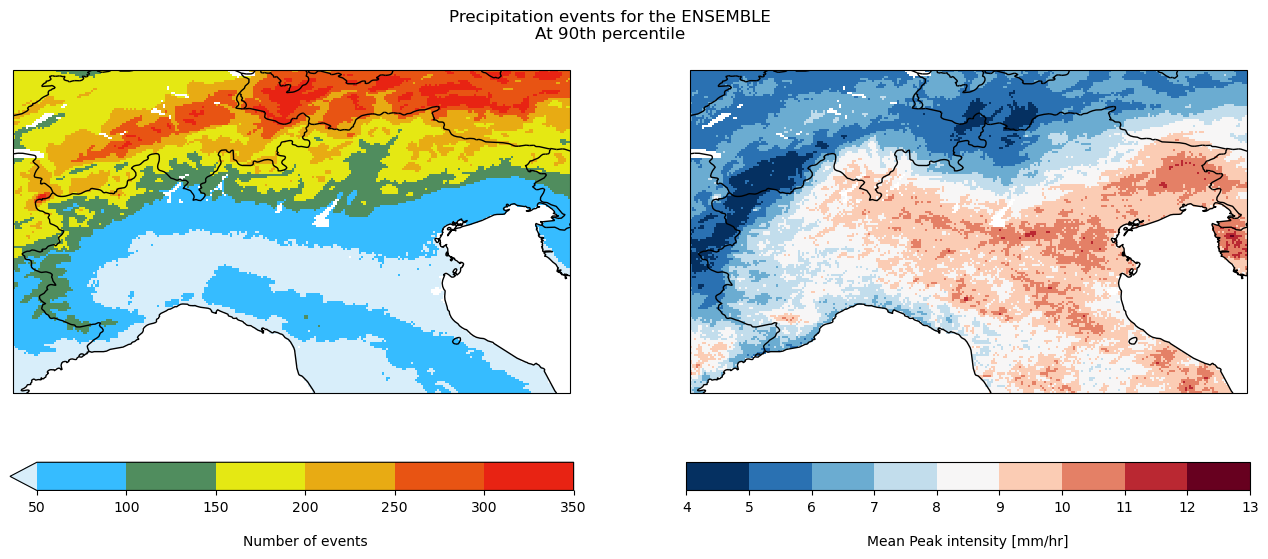

In [14]:
fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

img1=(ensemble_pr.n_event.mean(dim="model") * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap=cmap_q,
                                                                    levels=np.arange(50,351,50),
                                                                    ax=ax[0],add_colorbar=False)
img2=(ensemble_pr.max_int.mean(dim="model") * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap="RdBu_r",
                                                                    levels=np.arange(4,14,1),
                                                                    ax=ax[1],add_colorbar=False)

[ax[_].coastlines() for _ in range(2)]
[ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
# Add colorbar labels
cbar1 = plt.colorbar(img1,ax=ax[0],orientation='horizontal')
cbar1.set_label('Number of events', rotation=0, labelpad=15)

cbar2 = plt.colorbar(img2,ax=ax[1],orientation='horizontal')
cbar2.set_label('Mean Peak intensity [mm/hr]', rotation=0, labelpad=15)
plt.suptitle("Precipitation events for the ENSEMBLE\nAt 90th percentile");

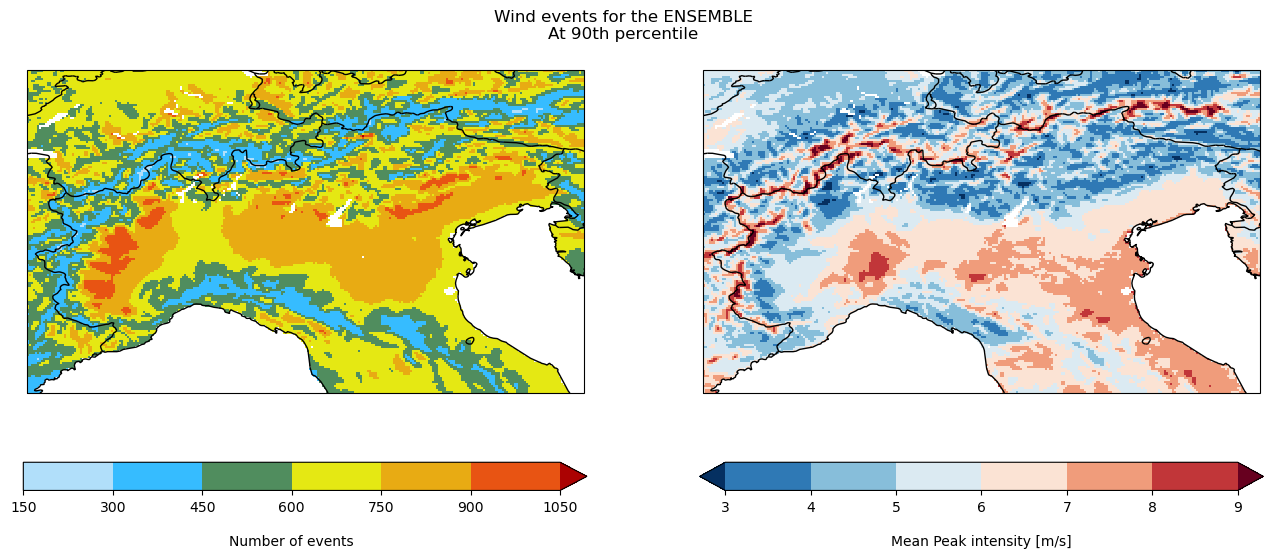

In [28]:
fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

img1=(ensemble_mw.n_event.mean(dim="model") * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap=cmap_q,
                                                                    levels=np.arange(150,1200,150),
                                                                    ax=ax[0],add_colorbar=False)
img2=(ensemble_mw.max_int.mean(dim="model") * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap="RdBu_r",
                                                                    levels=np.arange(3,10,1),
                                                                    ax=ax[1],add_colorbar=False)

[ax[_].coastlines() for _ in range(2)]
[ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
# Add colorbar labels
cbar1 = plt.colorbar(img1,ax=ax[0],orientation='horizontal')
cbar1.set_label('Number of events', rotation=0, labelpad=15)

cbar2 = plt.colorbar(img2,ax=ax[1],orientation='horizontal')
cbar2.set_label('Mean Peak intensity [m/s]', rotation=0, labelpad=15)
plt.suptitle("Wind events for the ENSEMBLE\nAt 90th percentile");

In [12]:
cmap_f,cmap_i,cmap_q=get_palettes()

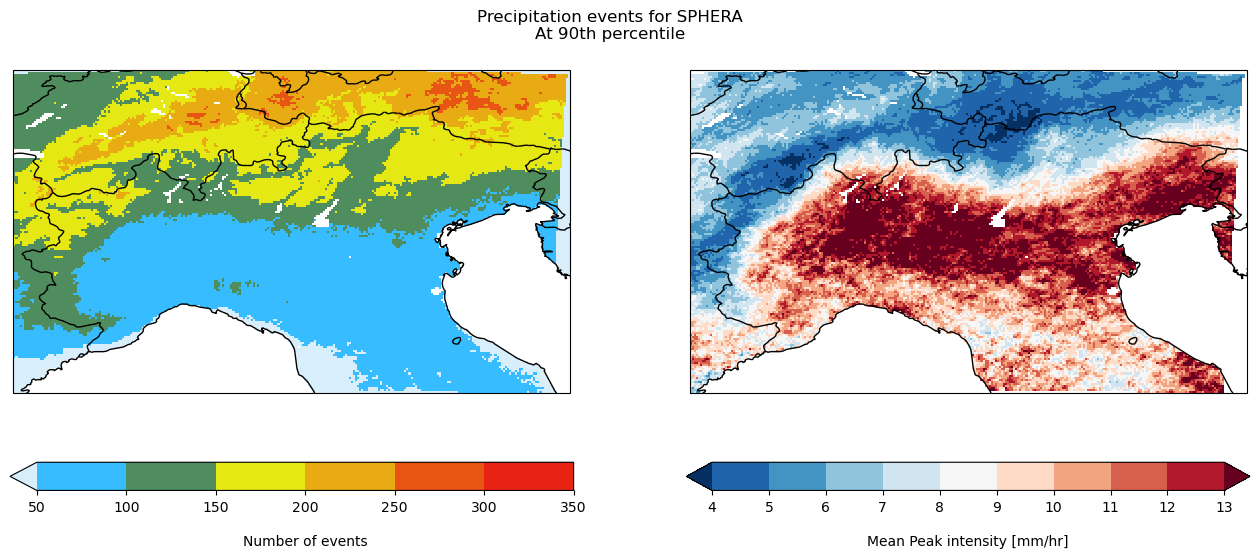

In [24]:
fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

img1=(ds_pr_sph.n_event * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap=cmap_q,
                                                                    levels=np.arange(50,351,50),
                                                                    ax=ax[0],add_colorbar=False)
img2=(ds_pr_sph.max_int * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap="RdBu_r",
                                                                    levels=np.arange(4,14,1),
                                                                    ax=ax[1],add_colorbar=False)

[ax[_].coastlines() for _ in range(2)]
[ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
# Add colorbar labels
cbar1 = plt.colorbar(img1,ax=ax[0],orientation='horizontal')
cbar1.set_label('Number of events', rotation=0, labelpad=15)

cbar2 = plt.colorbar(img2,ax=ax[1],orientation='horizontal')
cbar2.set_label('Mean Peak intensity [mm/hr]', rotation=0, labelpad=15)
plt.suptitle("Precipitation events for SPHERA\nAt 90th percentile");

In [20]:
# fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

# img1=(ds_pr_cpm.n_event * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap=cmap_q,
#                                                                     levels=np.arange(0,49,6),
#                                                                     ax=ax[0],add_colorbar=False)
# img2=(ds_pr_cpm.max_int * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap="RdBu_r",
#                                                                     levels=np.arange(0,49,6),
#                                                                     ax=ax[1],add_colorbar=False)

# [ax[_].coastlines() for _ in range(2)]
# [ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
# # Add colorbar labels
# cbar1 = plt.colorbar(img1,ax=ax[0],orientation='horizontal')
# cbar1.set_label('Number of events', rotation=0, labelpad=15)

# cbar2 = plt.colorbar(img2,ax=ax[1],orientation='horizontal')
# cbar2.set_label('Mean Peak intensity [mm/hr]', rotation=0, labelpad=15)
# plt.suptitle("Precipitation KNMI");

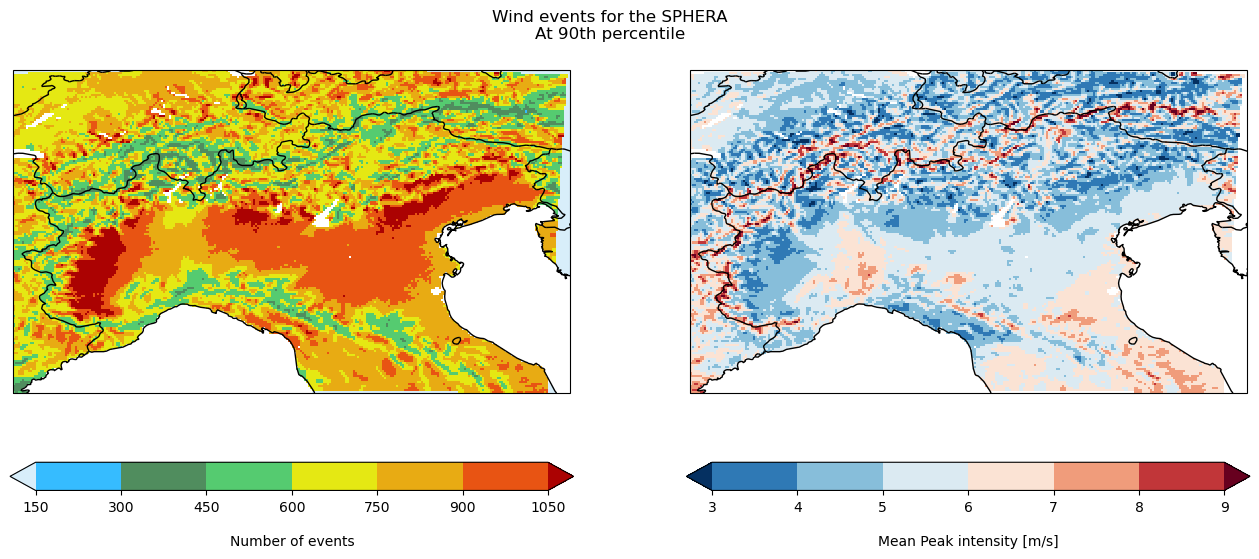

In [29]:
fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

img1=(ds_mw_sph.n_event * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap=cmap_q,
                                                                    levels=np.arange(150,1200,150),#np.arange(50,151,10),
                                                                    ax=ax[0],add_colorbar=False)
img2=(ds_mw_sph.max_int * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap="RdBu_r",
                                                                    levels=np.arange(3,10,1),#np.arange(3,17,1),
                                                                    ax=ax[1],add_colorbar=False)

[ax[_].coastlines() for _ in range(2)]
[ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
# Add colorbar labels
cbar1 = plt.colorbar(img1,ax=ax[0],orientation='horizontal')
cbar1.set_label('Number of events', rotation=0, labelpad=15)

cbar2 = plt.colorbar(img2,ax=ax[1],orientation='horizontal')
cbar2.set_label('Mean Peak intensity [m/s]', rotation=0, labelpad=15)
plt.suptitle("Wind events for the SPHERA\nAt 90th percentile");
# fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

# ds_mw.n_event.plot(cmap=cmap_q,
#                    #levels=np.arange(10,200,25),#np.nanquantile(ds_mw.n_event,q=np.arange(0.1,0.999,0.11125)),
#                    ax=ax[0],add_colorbar=True)
# ds_mw.max_int.plot(cmap="RdBu",
#                 #levels=np.nanquantile(ds_mw.avg_int,q=np.arange(0.1,0.999,0.11125)),
#                 ax=ax[1],add_colorbar=True)

# [ax[_].coastlines() for _ in range(2)]
# [ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
# plt.suptitle("Wind");

In [30]:
# fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

# img1=(ds_mw_cpm.n_event * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap=cmap_q,
#                                                                     levels=np.arange(50,151,10),
#                                                                     ax=ax[0],add_colorbar=False)
# img2=(ds_mw_cpm.max_int * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap="RdBu_r",
#                                                                     levels=np.arange(3,17,1),
#                                                                     ax=ax[1],add_colorbar=False)

# [ax[_].coastlines() for _ in range(2)]
# [ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
# # Add colorbar labels
# cbar1 = plt.colorbar(img1,ax=ax[0],orientation='horizontal')
# cbar1.set_label('Number of events', rotation=0, labelpad=15)

# cbar2 = plt.colorbar(img2,ax=ax[1],orientation='horizontal')
# cbar2.set_label('Mean Peak intensity [m/s]', rotation=0, labelpad=15)
# plt.suptitle("Wind KNMI");

# Combined

In [31]:
ds_cb_cpm

<xarray.Dataset>
Dimensions:  (lat: 158, lon: 272)
Coordinates:
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Data variables:
    n_event  (lat, lon) int64 2 2 3 2 2 3 2 4 3 ... 102 87 92 85 72 74 67 61 56
    avg_int  (lat, lon) float64 6.046 8.449 6.439 9.512 ... 5.379 5.428 5.665
    max_int  (lat, lon) float64 6.309 6.379 6.108 6.87 ... 4.919 4.727 5.028
Attributes: (12/31)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    history:                        Mon Feb 13 12:05:01 2023: cdo remapycon,n...
    source:                         HARMONIE Climate Modelling Community (HCL...
    institution:                    Royal Netherlands Meteorological Institute
    Conventions:                    CF-1.4
    frequency:                      1hr
    ...                             ...
    comment_1stNest:                direct downscaling from ERA-Interim 0.75x...
    comment_2ndNest:                actual convection permitting FPS simulati...
    references:                     https://hirlam.org/trac/wiki/HarmonieClimate
    knmi_global_comment:            converted from FA to NetCDF with gl/xtool...
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [34]:
ds_cb_sph.n_event * xr.where(sftlf.sftlf > 50,1,np.nan)

<xarray.DataArray (lat: 158, lon: 272)>
array([[ 2.,  2.,  4., ..., nan, nan, nan],
       [ 3.,  2.,  3., ..., nan, nan, nan],
       [ 2.,  2.,  3., ..., nan, nan, nan],
       ...,
       [18., 23., 23., ..., 68., 68.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57

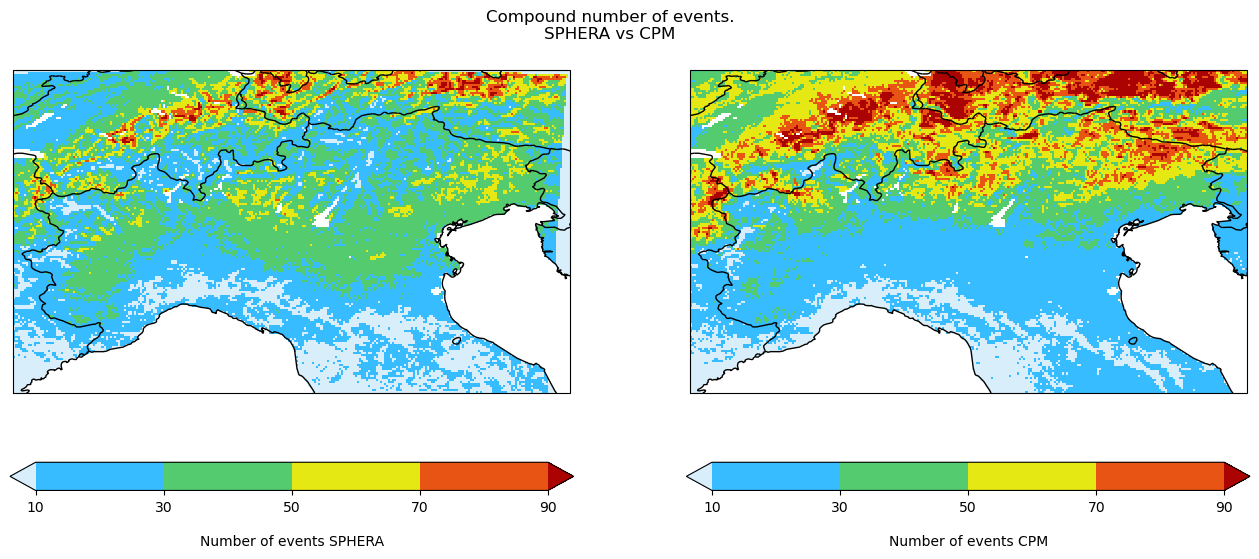

In [35]:
fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

img1=(ds_cb_sph.n_event * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap=cmap_q,
                                                                    levels=np.arange(10,91,20),#np.arange(1,8,1),
                                                                    ax=ax[0],add_colorbar=False)
img2=(ds_cb_cpm.n_event * xr.where(sftlf.sftlf > 50,1,np.nan)).plot(cmap=cmap_q,
                                                                    levels=np.arange(10,91,20),#np.arange(1,8,1),
                                                                    ax=ax[1],add_colorbar=False)

[ax[_].coastlines() for _ in range(2)]
[ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
# Add colorbar labels
cbar1 = plt.colorbar(img1,ax=ax[0],orientation='horizontal')
cbar1.set_label('Number of events SPHERA', rotation=0, labelpad=15)

cbar2 = plt.colorbar(img2,ax=ax[1],orientation='horizontal')
cbar2.set_label('Number of events CPM', rotation=0, labelpad=15)
plt.suptitle("Compound number of events.\nSPHERA vs CPM");

In [34]:
sftlf=xr.open_dataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/KNMI/CPM/sftlf_ALP-3_ECMWF-ERAINT_evaluation_r1i1p1_KNMI-HCLIM38h1-AROME_fpsconv-x2yn2-v1_fx.nc")

ds_cb_cpm=(ds_cb_cpm * xr.where(sftlf.sftlf > 50,1,0))
ds_cb_sph=(ds_cb_sph * xr.where(sftlf.sftlf > 50,1,0))

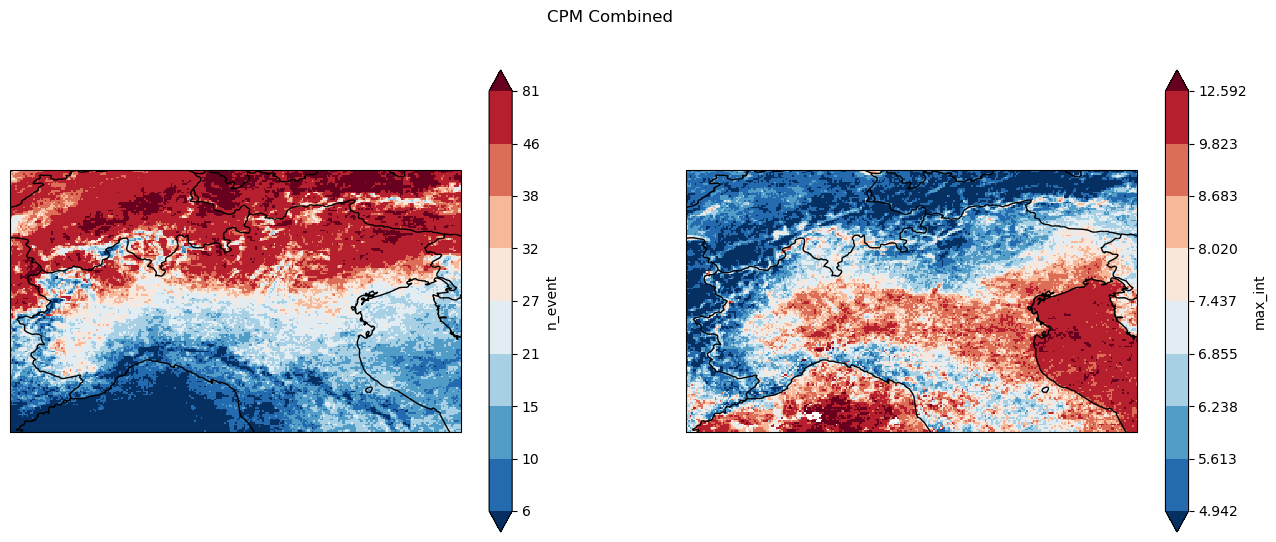

In [61]:
fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

ds_cb_cpm.n_event.plot(cmap="RdBu_r",
                   levels=np.nanquantile(ds_cb_sph.n_event,q=np.arange(0.1,0.999,0.11125)),
                   ax=ax[0],add_colorbar=True)
ds_cb_cpm.max_int.plot(cmap="RdBu_r",
                   levels=np.nanquantile(ds_cb_sph.max_int,q=np.arange(0.1,0.999,0.11125)),
                   ax=ax[1],add_colorbar=True)

[ax[_].coastlines() for _ in range(2)]
[ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
plt.suptitle(f"CPM Combined");

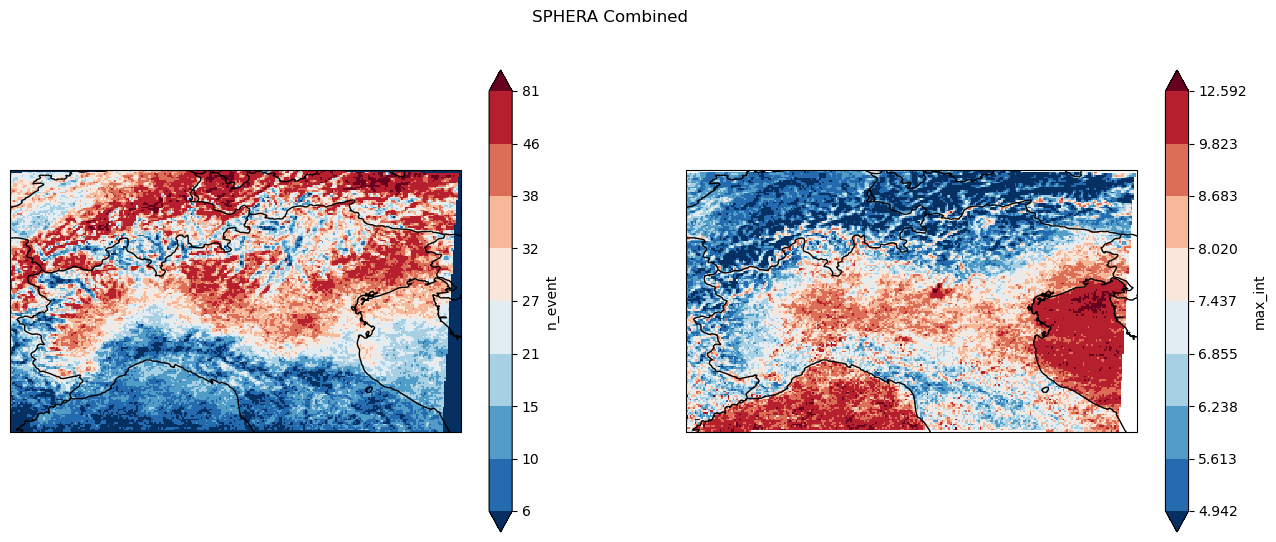

In [62]:
fig,ax = plt.subplots(1,2, figsize=(16,6),subplot_kw={"projection":ccrs.PlateCarree()})

ds_cb_sph.n_event.plot(cmap="RdBu_r",
                   levels=np.nanquantile(ds_cb_sph.n_event,q=np.arange(0.1,0.999,0.11125)),
                   ax=ax[0],add_colorbar=True)
ds_cb_sph.max_int.plot(cmap="RdBu_r",
                   levels=np.nanquantile(ds_cb_sph.max_int,q=np.arange(0.1,0.999,0.11125)),
                   ax=ax[1],add_colorbar=True)

[ax[_].coastlines() for _ in range(2)]
[ax[_].add_feature(cfeature.BORDERS) for _ in range(2)]
plt.suptitle(f"SPHERA Combined");